# Retrieval-Augmented Shopping Assistant - EDA

This notebook explores the ABO dataset for initial insights.

In [2]:
import pandas as pd

In [3]:
# Load ABO image dataset
df_img = pd.read_csv("/kaggle/input/amazon-berkeley-objects/images/metadata/images.csv")  # or csv if applicable

(398212, 4)
Index(['image_id', 'height', 'width', 'path'], dtype='object')
image_id    object
height       int64
width        int64
path        object
dtype: object
image_id    398212
height      398212
width       398212
path        398212
dtype: int64


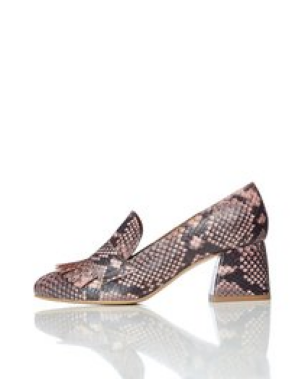

In [4]:
# 1. Check structure
print(df_img.shape)
print(df_img.columns)
print(df_img.dtypes)

# 2. Check missing values
print(df_img.notnull().sum())

# 3. Sample record
df_img.sample(5)

# 4. (If possible) display an image
from PIL import Image
import matplotlib.pyplot as plt

img_loc = str(df_img.loc[df_img['path']== '8c/8ccb5859.jpg']['path']).split()[1]
img_path = '/kaggle/input/amazon-berkeley-objects/images/small/' + img_loc  # based on image_id field
img = Image.open(img_path)
plt.imshow(img)
plt.axis('off')
plt.show()

In [5]:
# Load ABO metadata dataset

import os, glob
full_metadata = pd.DataFrame()
for json_file in glob.glob("/kaggle/input/listing/listings/metadata/*.json"):
    print('Loading file: ' + json_file + '\n')
    df_metadata = pd.read_json(json_file, lines = True)
    full_metadata = pd.concat([full_metadata, df_metadata])

Loading file: /kaggle/input/listing/listings/metadata/listings_3.json

Loading file: /kaggle/input/listing/listings/metadata/listings_d.json

Loading file: /kaggle/input/listing/listings/metadata/listings_b.json

Loading file: /kaggle/input/listing/listings/metadata/listings_a.json

Loading file: /kaggle/input/listing/listings/metadata/listings_4.json

Loading file: /kaggle/input/listing/listings/metadata/listings_8.json

Loading file: /kaggle/input/listing/listings/metadata/listings_9.json

Loading file: /kaggle/input/listing/listings/metadata/listings_f.json

Loading file: /kaggle/input/listing/listings/metadata/listings_0.json

Loading file: /kaggle/input/listing/listings/metadata/listings_6.json

Loading file: /kaggle/input/listing/listings/metadata/listings_c.json

Loading file: /kaggle/input/listing/listings/metadata/listings_2.json

Loading file: /kaggle/input/listing/listings/metadata/listings_5.json

Loading file: /kaggle/input/listing/listings/metadata/listings_1.json

Loadin

In [6]:
# 1. Check structure
print(full_metadata.shape)
print(full_metadata.columns)
print(full_metadata.dtypes)

(147702, 28)
Index(['brand', 'bullet_point', 'color', 'item_id', 'item_name', 'item_weight',
       'material', 'model_name', 'model_number', 'product_type',
       'main_image_id', 'other_image_id', 'item_keywords', 'country',
       'marketplace', 'domain_name', 'node', 'style', 'item_dimensions',
       'model_year', 'color_code', 'spin_id', '3dmodel_id', 'fabric_type',
       'item_shape', 'pattern', 'product_description', 'finish_type'],
      dtype='object')
brand                  object
bullet_point           object
color                  object
item_id                object
item_name              object
item_weight            object
material               object
model_name             object
model_number           object
product_type           object
main_image_id          object
other_image_id         object
item_keywords          object
country                object
marketplace            object
domain_name            object
node                   object
style                

In [7]:
# 2. Check missing values
full_metadata.isna().sum().sort_values(ascending=False)

finish_type            146166
product_description    143462
pattern                143112
item_shape             142636
model_year             139937
3dmodel_id             139742
fabric_type            139509
spin_id                139480
color_code             129459
style                  104514
item_dimensions        104364
material                94117
model_name              66123
item_weight             41508
color                   31522
model_number            23611
item_keywords           20926
bullet_point            16132
other_image_id           9726
node                     6953
main_image_id             575
brand                      59
item_id                     0
item_name                   0
product_type                0
marketplace                 0
domain_name                 0
country                     0
dtype: int64

From above, "finish_type" column has the lowest number of values present i.e. 1536 (147702 - 146166)  out of 147702 product entries.

In [8]:
#Find duplicate item_id rows

duplicate_counts = full_metadata['item_id'].value_counts()
duplicate_counts = duplicate_counts[duplicate_counts > 1]
print(duplicate_counts)

item_id
B01BC2TBZ4    5
B00MEAYVH2    5
B00Q4TK5KG    5
B00Q6EY5UU    5
B07F87HC4V    4
             ..
B07R8FR8S4    2
B07Z58WTMK    2
B082MV768H    2
B06X9GMSD5    2
B07RPND47Z    2
Name: count, Length: 1932, dtype: int64


There are duplicates but analyising one of the item_id below.

In [9]:
full_metadata.loc[full_metadata['item_id'] == 'B01BC2TBZ4']

,brand,bullet_point,color,item_id,item_name,item_weight,material,model_name,model_number,product_type,...,item_dimensions,model_year,color_code,spin_id,3dmodel_id,fabric_type,item_shape,pattern,product_description,finish_type
3100,"[{'language_tag': 'es_ES', 'value': 'AmazonBas...","[{'language_tag': 'es_ES', 'value': 'Juego de ...",NaN,B01BC2TBZ4,"[{'language_tag': 'es_ES', 'value': 'AmazonBas...",NaN,NaN,NaN,NaN,[{'value': 'HOME_BED_AND_BATH'}],...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5348,"[{'language_tag': 'it_IT', 'value': 'AmazonBas...","[{'language_tag': 'it_IT', 'value': 'Set di X ...",NaN,B01BC2TBZ4,"[{'language_tag': 'it_IT', 'value': 'AmazonBas...",NaN,NaN,NaN,NaN,[{'value': 'HOME_BED_AND_BATH'}],...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
537,"[{'language_tag': 'fr_FR', 'value': 'AmazonBas...","[{'language_tag': 'fr_FR', 'value': 'Lot de X ...",NaN,B01BC2TBZ4,"[{'language_tag': 'fr_FR', 'value': 'AmazonBas...",NaN,NaN,NaN,NaN,[{'value': 'HOME_BED_AND_BATH'}],...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4274,"[{'language_tag': 'en_AU', 'value': 'AmazonBas...","[{'language_tag': 'en_AU', 'value': 'Set of 2 ...",NaN,B01BC2TBZ4,"[{'language_tag': 'en_AU', 'value': 'AmazonBas...",NaN,NaN,NaN,NaN,[{'value': 'HOME_BED_AND_BATH'}],...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7099,"[{'language_tag': 'sv_SE', 'value': 'AmazonBas...","[{'language_tag': 'sv_SE', 'value': 'Set med 2...",NaN,B01BC2TBZ4,"[{'language_tag': 'sv_SE', 'value': 'AmazonBas...",NaN,NaN,NaN,NaN,[{'value': 'HOME_BED_AND_BATH'}],...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


There are duplicate item_ids, because of multiple language support. We will remove duplicates after creating 
a scoped dataframe for supported language.

In [10]:
# 3. Sample record
pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_columns', None)
#full_metadata.sample(5)

From above, it is clear that:
1. Only **item_name** column is present for all products.
2. We will use **item_name** to filter for in scope language - English.

In [11]:
# 4. Display an image using image id from the metadata

from PIL import Image
import matplotlib.pyplot as plt
print(full_metadata.loc[full_metadata['main_image_id'] == '413jqtAkNSL'])

                                                     brand  \
5348  [{'language_tag': 'it_IT', 'value': 'AmazonBasics'}]   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                    bullet_point  \
5348  [{'language_tag': 'it_IT', 'value': 'Set di X o X federe copricuscino.'}, {'language_tag': 'it_IT', 'value': 'Realizzate in 100% cotone (85 g/mq) per aggiungere uno strato extra di morbido comfort.'}, {'language_tag': 'it_IT', 'value': 'Cerniera nascosta per tenere il cuscino in posizione durante la notte.'}, {'language_tag': 'it_IT', 'value': 'Lavabili in lavatrice con colori simil

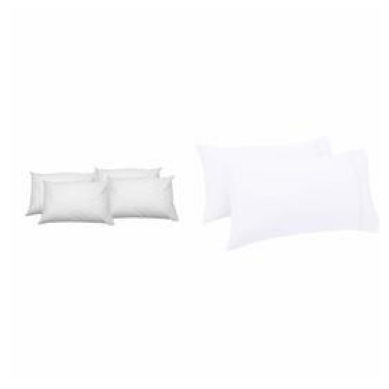

In [12]:
img_row = full_metadata.loc[full_metadata['main_image_id'] == '413jqtAkNSL']
img_id = img_row.iloc[0]['main_image_id']
img_location = str(df_img.loc[df_img['image_id'] == img_id]['path'])
img = Image.open('/kaggle/input/amazon-berkeley-objects/images/small/' + img_location.split()[1])
plt.imshow(img)
plt.axis('off')
plt.show()

In [13]:
# Analyse the number of languages supported. US-English in scope only.
count_US_lang_key = 0
count_prodDesc = 0
count_total=0
lang_set = set()
for val in full_metadata['item_name']:
    count_total += 1
    for key, value in val[0].items():
        if(key == 'language_tag'):
            lang_set.add(value)
print(lang_set)

{'en_US', 'ar_AE', 'en_IN', 'kn_IN', 'it_IT', 'cs_CZ', 'tr_TR', 'hi_IN', 'en_AU', 'ko_KR', 'en_GB', 'de_DE', 'sv_SE', 'ja_JP', 'zh_CN', 'en_AE', 'en_SG', 'es_MX', 'pt_BR', 'ml_IN', 'nl_NL', 'es_US', 'en_CA', 'pl_PL', 'zh_TW', 'es_ES', 'fr_FR', 'fr_CA', 'he_IL', 'te_IN'}


Amongst these, English language to be in scope for now. i.e,
en_SG,
en_CA,
en_AU,
en_GB, 
en_AE, 
en_US,
en_IN

In [14]:
valid_languages = {'en_SG', 'en_CA', 'en_AU', 'en_GB', 'en_AE', 'en_US', 'en_IN'}

countTotalProdDesc = 0
countTotalEngDesc = 0

for val in full_metadata['item_name']:
    if isinstance(val, list):
        for item in val:
            if isinstance(item, dict):
                countTotalProdDesc += 1
                if item.get('language_tag') in valid_languages:
                    countTotalEngDesc += 1

print('Total language-tagged entries (all languages):', countTotalProdDesc)
print('Total in-scope English entries:', countTotalEngDesc)
print('Percentage of data under scope:', round(countTotalEngDesc / countTotalProdDesc * 100, 2), '%')

Total language-tagged entries (all languages): 251132
Total in-scope English entries: 122913
Percentage of data under scope: 48.94 %


In [15]:
# Reduce the metadata to in scope languages only
def has_valid_language(item_name):
    if isinstance(item_name, list):
        return any(
            isinstance(entry, dict) and entry.get('language_tag') in valid_languages
            for entry in item_name
        )
    return False

inScopeMetadata = full_metadata[full_metadata['item_name'].apply(has_valid_language)].reset_index(drop=True)

In [16]:
print(inScopeMetadata.shape)

(122734, 28)


In [17]:
from collections import Counter

lang_counter = Counter()

for val in full_metadata['item_name']:
    if isinstance(val, list):
        for item in val:
            if isinstance(item, dict):
                lang = item.get('language_tag')
                if lang:
                    lang_counter[lang] += 1

# Convert to sorted list
sorted_langs = sorted(lang_counter.items(), key=lambda x: x[1], reverse=True)

# Print
print("Language-wise distribution in `item_name` field:\n")
for lang, count in sorted_langs:
    print(f"{lang}: {count}")

Language-wise distribution in `item_name` field:

en_IN: 76443
en_US: 26424
de_DE: 15097
es_US: 12012
zh_CN: 11701
pt_BR: 9953
ko_KR: 8777
zh_TW: 8766
en_GB: 8146
he_IL: 7499
hi_IN: 7461
en_CA: 6850
ar_AE: 6631
es_MX: 4915
es_ES: 4549
fr_FR: 4189
it_IT: 3965
ja_JP: 3738
nl_NL: 3555
fr_CA: 2403
ml_IN: 2396
tr_TR: 2170
en_AU: 2149
cs_CZ: 1891
pl_PL: 1872
en_AE: 1561
te_IN: 1354
en_SG: 1340
pt_PT: 1115
sv_SE: 1033
ta_IN: 593
kn_IN: 582
mr_IN: 2


In [18]:
def get_first_valid_lang(item_name):
    if isinstance(item_name, list):
        for entry in item_name:
            if isinstance(entry, dict) and entry.get('language_tag') in valid_languages:
                return entry['language_tag']
    return None

full_metadata['language_matched'] = full_metadata['item_name'].apply(get_first_valid_lang)

In [19]:
print(f"Total rows with valid English variants: {len(inScopeMetadata)} / {len(full_metadata)}")

Total rows with valid English variants: 122734 / 147702


In [20]:
#Find duplicate item_id rows

duplicate_counts = inScopeMetadata['item_id'].value_counts()
duplicate_counts = duplicate_counts[duplicate_counts > 1]
print(duplicate_counts)

item_id
B00TIFV5BG    3
B07NQ9KZMK    3
B01NGTPJKB    3
B082T6DGFY    3
B07CTNGHM3    3
             ..
B07WGNMJB1    2
B07TJ1DRL8    2
B072N7GGKB    2
B07DWD8HZG    2
B07VTSPZ6Z    2
Name: count, Length: 707, dtype: int64


In [41]:
inScopeMetadata.loc[inScopeMetadata['item_id'] == 'B00TIFV5BG']

,brand,bullet_point,color,item_id,item_name,item_weight,material,model_name,model_number,product_type,main_image_id,other_image_id,item_keywords,country,marketplace,domain_name,node,style,item_dimensions,model_year,color_code,spin_id,3dmodel_id,fabric_type,item_shape,pattern,product_description,finish_type,brand_flat,bullet_point_flat,color_flat,item_name_flat,item_weight_flat,material_flat,model_name_flat,model_number_flat,product_type_flat,item_keywords_flat,node_flat
16990,"[{'language_tag': 'en_AU', 'value': 'AmazonBasics'}]","[{'language_tag': 'en_AU', 'value': 'An Amazon Brand'}]",NaN,B00TIFV5BG,"[{'language_tag': 'en_AU', 'value': 'AmazonBasics 16/3 Vinyl Outdoor Extension Cord - (Orange)'}]",NaN,NaN,NaN,[{'value': 'KT101-Parent'}],[{'value': 'HOME_LIGHTING_ACCESSORY'}],81DT3WFI4ZL,"[811F6EBvLwL, 71jWcroVsQL, 81LSc+D+-KL, 61Xu+sa1gTL]",NaN,AU,Amazon,amazon.com.au,"[{'node_id': 4852503051, 'node_name': '/Categories'}, {'node_id': 4885445051, 'node_name': '/Categories/Power Accessories/Extension Cords'}]",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,AmazonBasics,An Amazon Brand,None,AmazonBasics 16/3 Vinyl Outdoor Extension Cord - (Orange),None,None,None,KT101-Parent,HOME_LIGHTING_ACCESSORY,None,"/Categories, /Categories/Power Accessories/Extension Cords"
42977,"[{'language_tag': 'en_US', 'value': 'AmazonBasics'}]","[{'language_tag': 'en_US', 'value': 'An Amazon Brand'}]",NaN,B00TIFV5BG,"[{'language_tag': 'en_US', 'value': 'AmazonBasics 16/3 Vinyl Outdoor Extension Cord'}]",NaN,NaN,NaN,[{'value': 'KT101-Parent'}],[{'value': 'HOME_LIGHTING_ACCESSORY'}],81ompRLEmoL,"[811F6EBvLwL, 71jWcroVsQL, 81LSc+D+-KL, 61Xu+sa1gTL]",NaN,US,PrimeNow,primenow.amazon.com,"[{'node_id': 468240, 'node_name': '/Categories'}]",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,AmazonBasics,An Amazon Brand,None,AmazonBasics 16/3 Vinyl Outdoor Extension Cord,None,None,None,KT101-Parent,HOME_LIGHTING_ACCESSORY,None,/Categories
116464,"[{'language_tag': 'en_CA', 'value': 'AmazonBasics'}]","[{'language_tag': 'en_CA', 'value': 'An Amazon Brand'}, {'language_tag': 'fr_CA', 'value': 'Marque Amazon'}]",NaN,B00TIFV5BG,"[{'language_tag': 'en_CA', 'value': 'AmazonBasics 16/3 Vinyl Outdoor Extension Cord - (Orange)'}, {'language_tag': 'fr_CA', 'value': 'AmazonBasics 16/3 Rallonge extérieure en vinyle Orange'}]",NaN,NaN,NaN,[{'value': 'KT101-Parent'}],[{'value': 'HOME_LIGHTING_ACCESSORY'}],813Dn19M6RL,"[61wDq9Ikh0L, 61FihnNe9qL, A1qTOHRIbIL]",NaN,CA,Amazon,amazon.ca,"[{'node_id': 3111743011, 'node_name': '/Categories/Electrical/Extension Cords'}]",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,AmazonBasics,"An Amazon Brand, Marque Amazon",None,"AmazonBasics 16/3 Vinyl Outdoor Extension Cord - (Orange), AmazonBasics 16/3 Rallonge extérieure en vinyle Orange",None,None,None,KT101-Parent,HOME_LIGHTING_ACCESSORY,None,/Categories/Electrical/Extension Cords


In [22]:
def auto_flatten_json_columns(df, keys_to_try=['value', 'name', 'node_name']):
    """
    Detects and flattens columns containing lists of JSON objects,
    extracting specified keys.
    Adds new columns with a `_flat` suffix.
    """
    def extract_from_list(ld, keys):
        if isinstance(ld, list):
            for key in keys:
                values = [str(d.get(key)) for d in ld if isinstance(d, dict) and key in d]
                if values:  # found at least one valid value
                    return ", ".join(values)
        return None

    # Track flattened columns
    flattened = []

    for col in df.columns:
        sample = df[col].iloc[0]
        if isinstance(sample, list) and all(isinstance(i, dict) for i in sample):
            flat_col = f"{col}_flat"
            df[flat_col] = df[col].apply(lambda x: extract_from_list(x, keys_to_try))
            flattened.append(flat_col)

    return df, flattened

In [23]:
print(inScopeMetadata.shape)

(122734, 28)


In [24]:
inScopeMetadata, flattened_cols = auto_flatten_json_columns(inScopeMetadata)
print("Flattened columns:", flattened_cols)


Flattened columns: ['brand_flat', 'bullet_point_flat', 'color_flat', 'item_name_flat', 'item_weight_flat', 'material_flat', 'model_name_flat', 'model_number_flat', 'product_type_flat', 'item_keywords_flat', 'node_flat']


In [25]:
print(inScopeMetadata.columns)

Index(['brand', 'bullet_point', 'color', 'item_id', 'item_name', 'item_weight',
       'material', 'model_name', 'model_number', 'product_type',
       'main_image_id', 'other_image_id', 'item_keywords', 'country',
       'marketplace', 'domain_name', 'node', 'style', 'item_dimensions',
       'model_year', 'color_code', 'spin_id', '3dmodel_id', 'fabric_type',
       'item_shape', 'pattern', 'product_description', 'finish_type',
       'brand_flat', 'bullet_point_flat', 'color_flat', 'item_name_flat',
       'item_weight_flat', 'material_flat', 'model_name_flat',
       'model_number_flat', 'product_type_flat', 'item_keywords_flat',
       'node_flat'],
      dtype='object')


In [26]:
print(full_metadata.shape)

(147702, 29)


In [27]:
full_metadata, flattened_cols = auto_flatten_json_columns(full_metadata)
print("Flattened columns:", flattened_cols)

Flattened columns: ['brand_flat', 'bullet_point_flat', 'color_flat', 'item_name_flat', 'item_weight_flat', 'material_flat', 'model_name_flat', 'model_number_flat', 'product_type_flat', 'item_keywords_flat', 'node_flat']


In [28]:
print(full_metadata.shape)

(147702, 40)


In [29]:
print(full_metadata.dtypes)

brand                  object
bullet_point           object
color                  object
item_id                object
item_name              object
item_weight            object
material               object
model_name             object
model_number           object
product_type           object
main_image_id          object
other_image_id         object
item_keywords          object
country                object
marketplace            object
domain_name            object
node                   object
style                  object
item_dimensions        object
model_year             object
color_code             object
spin_id                object
3dmodel_id             object
fabric_type            object
item_shape             object
pattern                object
product_description    object
finish_type            object
language_matched       object
brand_flat             object
bullet_point_flat      object
color_flat             object
item_name_flat         object
item_weigh

In [30]:
# 2. Check missing values
print(full_metadata.notnull().sum())

brand                  147643
bullet_point           131570
color                  116180
item_id                147702
item_name              147702
item_weight            106194
material                53585
model_name              81579
model_number           124091
product_type           147702
main_image_id          147127
other_image_id         137976
item_keywords          126776
country                147702
marketplace            147702
domain_name            147702
node                   140749
style                   43188
item_dimensions         43338
model_year               7765
color_code              18243
spin_id                  8222
3dmodel_id               7960
fabric_type              8193
item_shape               5066
pattern                  4590
product_description      4240
finish_type              1536
language_matched       122734
brand_flat             147643
bullet_point_flat      131570
color_flat             116180
item_name_flat         147702
item_weigh

In [31]:
print(full_metadata.index[:10])

Index([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype='int64')


In [32]:
full_metadata = full_metadata.reset_index(drop=True)

In [33]:
print(full_metadata.loc[1])  # Row with index label 1

brand                                                             [{'language_tag': 'en_US', 'value': 'Ravenna Home'}]
bullet_point                                                                                                       NaN
color                                                               [{'language_tag': 'en_US', 'value': 'Light Grey'}]
item_id                                                                                                     B07KRBPKT6
item_name                                      [{'language_tag': 'en_US', 'value': 'Light Grey Swatch, Ravenna Home'}]
item_weight                   [{'normalized_value': {'unit': 'pounds', 'value': 0.1}, 'unit': 'pounds', 'value': 0.1}]
material                                                                                                           NaN
model_name                                                                                                         NaN
model_number                                    

In [34]:
print(full_metadata.columns)

Index(['brand', 'bullet_point', 'color', 'item_id', 'item_name', 'item_weight',
       'material', 'model_name', 'model_number', 'product_type',
       'main_image_id', 'other_image_id', 'item_keywords', 'country',
       'marketplace', 'domain_name', 'node', 'style', 'item_dimensions',
       'model_year', 'color_code', 'spin_id', '3dmodel_id', 'fabric_type',
       'item_shape', 'pattern', 'product_description', 'finish_type',
       'language_matched', 'brand_flat', 'bullet_point_flat', 'color_flat',
       'item_name_flat', 'item_weight_flat', 'material_flat',
       'model_name_flat', 'model_number_flat', 'product_type_flat',
       'item_keywords_flat', 'node_flat'],
      dtype='object')


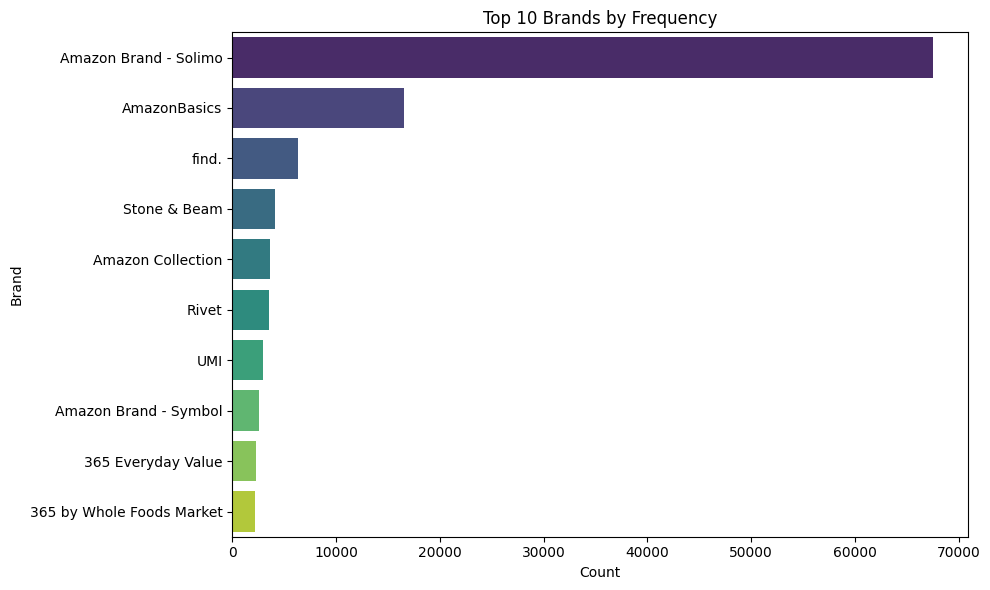

In [35]:
#1. Top 10 Brands

import matplotlib.pyplot as plt
import seaborn as sns

top_brands = full_metadata['brand_flat'].value_counts().head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_brands.values, y=top_brands.index, palette='viridis')
plt.title("Top 10 Brands by Frequency")
plt.xlabel("Count")
plt.ylabel("Brand")
plt.tight_layout()
plt.show()

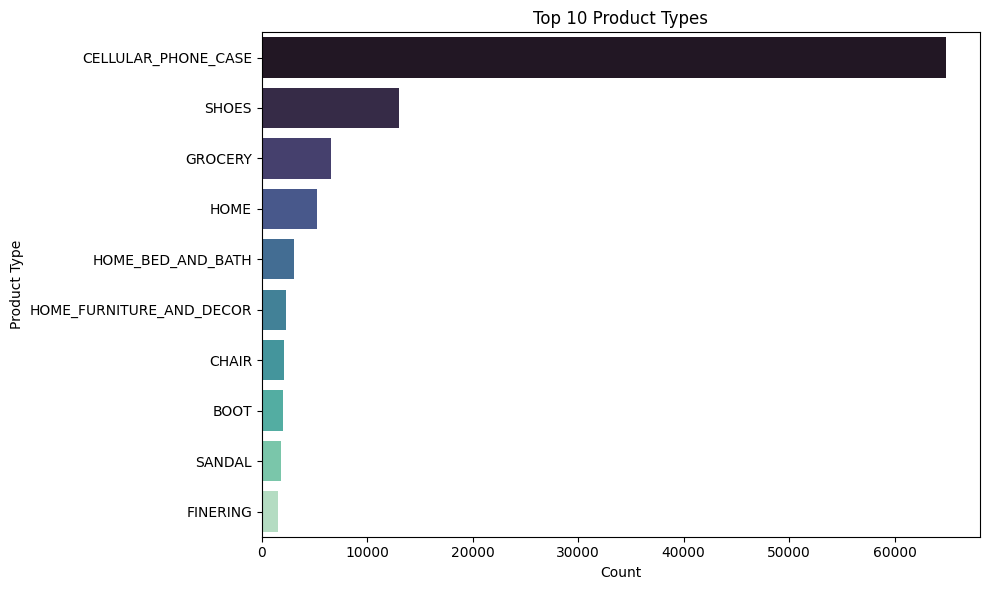

In [36]:
# Top 10 product types

top_types = full_metadata['product_type_flat'].value_counts().head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_types.values, y=top_types.index, palette='mako')
plt.title("Top 10 Product Types")
plt.xlabel("Count")
plt.ylabel("Product Type")
plt.tight_layout()
plt.show()

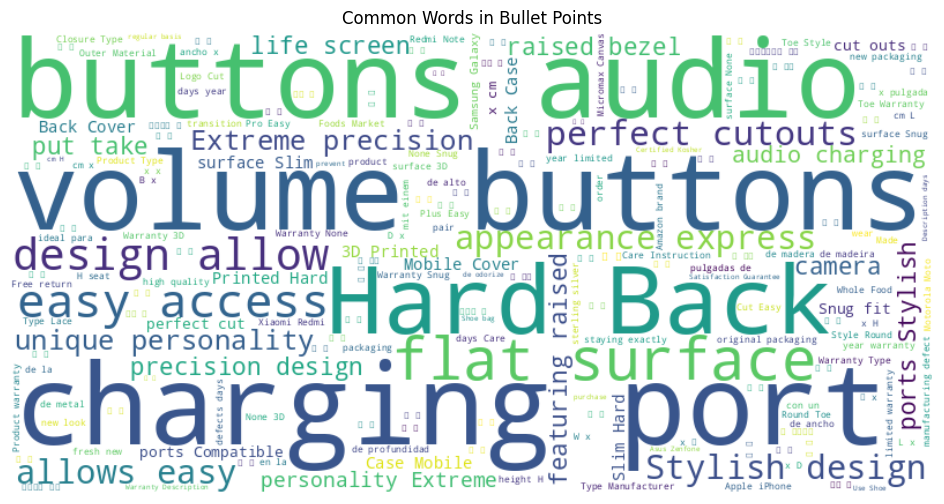

In [37]:
#Word cloud from bullet_point information

from wordcloud import WordCloud

text = " ".join(full_metadata['bullet_point_flat'].dropna().astype(str).values)
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Common Words in Bullet Points")
plt.show()

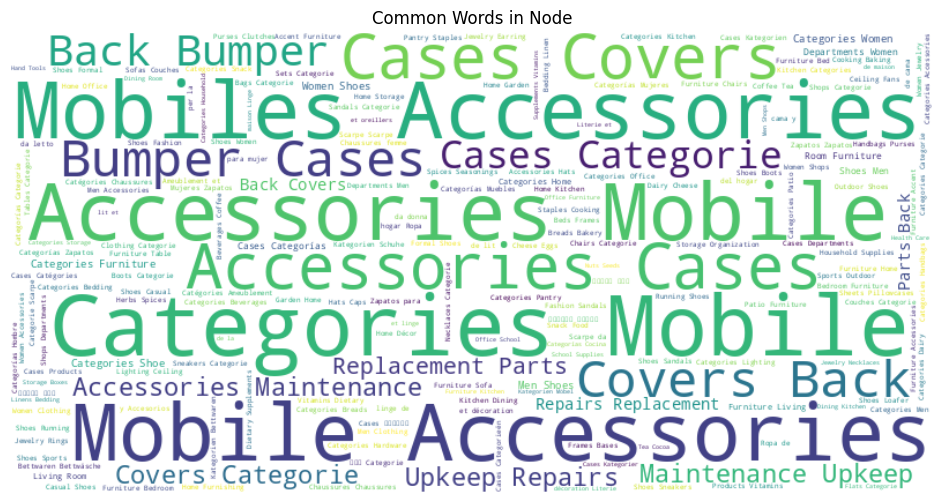

In [38]:
#Word cloud from node information

from wordcloud import WordCloud

text = " ".join(full_metadata['node_flat'].dropna().astype(str).values)
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Common Words in Node")
plt.show()

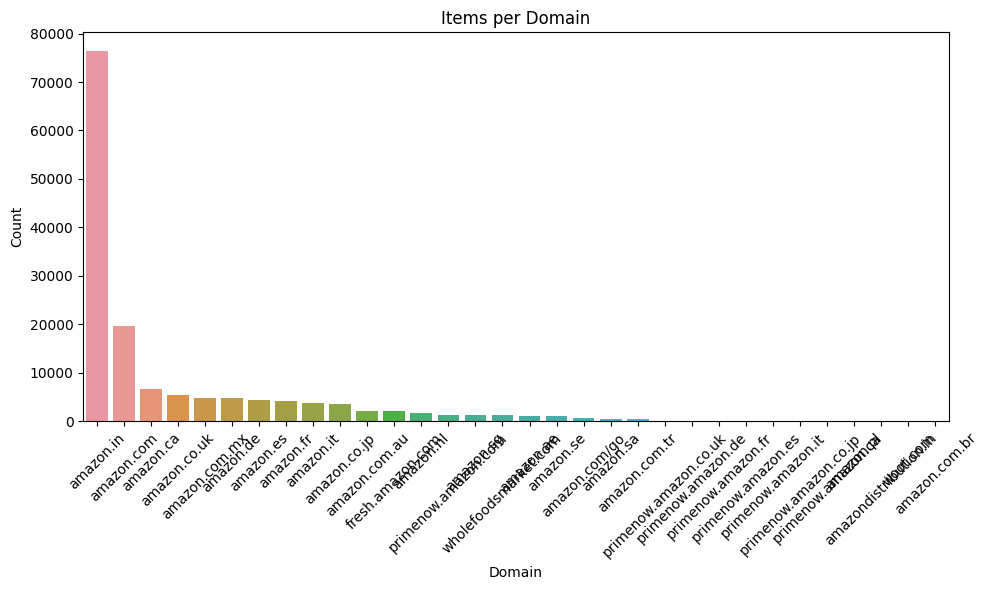

In [39]:
plt.figure(figsize=(10, 6))
sns.countplot(data=full_metadata, x='domain_name', order=full_metadata['domain_name'].value_counts().index)
plt.title("Items per Domain")
plt.xlabel("Domain")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Above plots show:
1. More than half of the items are on "Amazon" marketplace.
2. Cellular phone Case, Shoes, Grocery are top 3 product types.
3. Amazon.in accounts for more than half of listings.
4. Words around mobile accessories dominate the product's catefories description column (node).
5. Multiple languages are supported per product. Languages list:
{'ko_KR', 'es_MX', 'zh_TW', 'sv_SE', 'en_AU', 'fr_CA', 'en_CA', 'he_IL', 'es_US', 'kn_IN', 'tr_TR', 'hi_IN', 'zh_CN', 'en_GB', 'nl_NL', 'pt_BR', 'fr_FR', 'te_IN', 'ja_JP', 'en_IN', 'es_ES', 'en_US', 'ar_AE', 'en_SG', 'ml_IN', 'en_AE', 'cs_CZ', 'it_IT', 'pl_PL', 'de_DE'}

The full_metadata will be used

In [42]:
#Serialize English language entries to parquet/persistent storage

inScopeMetadata.to_parquet("inScopeMetadata_flattened.parquet", index=False)


In [43]:
#Serialize English language entries to parquet/persistent storage

full_metadata.to_parquet("full_metadata_flattened.parquet", index=False)


With above copy, we have:

1. inScopeMetadata_flattened.parquet → Flattened (json structure removed) English language metadata
2. full_metadata_flattened.parquet → Flattened (json structure removed) Full metadata
